In [ ]:
# !pip install mapclassify
# !pip install pandas
# !pip install plotly

In [12]:
import pandas as pd
import plotly.express as px

# Read the dataset from a file
# df = pd.read_csv('/content/dataset/forest_percent_by_country.csv') # for colabe
df = pd.read_csv('/kaggle/input/percent-forest-by-country/forest_percent_by_country.csv')
df

,country_code,country_name,year,value
0,ABW,Aruba,1990,2.333333
1,ABW,Aruba,1991,2.333333
2,ABW,Aruba,1992,2.333333
3,ABW,Aruba,1993,2.333333
4,ABW,Aruba,1994,2.333333
...,...,...,...,...
8038,ZWE,Zimbabwe,2016,45.570273
8039,ZWE,Zimbabwe,2017,45.451183
8040,ZWE,Zimbabwe,2018,45.332093
8041,ZWE,Zimbabwe,2019,45.213002


In [13]:
# Create a choropleth map
fig = px.choropleth(df, locations='country_code', color='value',
                    hover_name='country_name', animation_frame='year',
                    title='Forest Coverage by Country (1990-2020)',
                    labels={'value': 'Forest Coverage'})

fig.show()

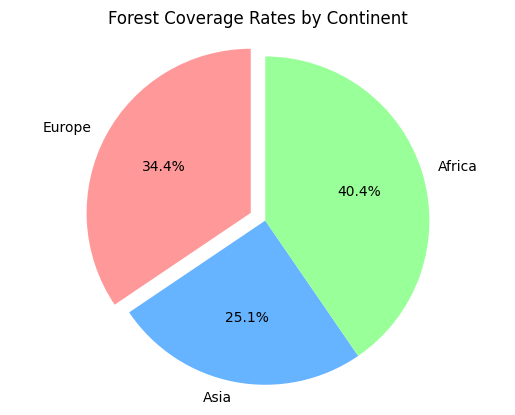

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Filter data for European, Asian, and African countries
europe_countries = ['Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland',
                    'Romania', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 'Czech Republic', 'Hungary',
                    'Sweden', 'Austria', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway', 'Ireland',
                    'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'North Macedonia',
                    'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 'Iceland',
                    'Andorra', 'Liechtenstein', 'Monaco', 'San Marino', 'Vatican City']

asia_countries = ['China', 'India', 'Indonesia', 'Pakistan', 'Bangladesh', 'Japan', 'Philippines', 'Vietnam',
                  'Turkey', 'Iran', 'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan', 'Saudi Arabia',
                  'Uzbekistan', 'Malaysia', 'Yemen', 'Nepal', 'North Korea', 'Sri Lanka', 'Kazakhstan', 'Syria',
                  'Cambodia', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Tajikistan', 'Israel',
                  'Laos', 'Lebanon', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'Oman', 'State of Palestine',
                  'Kuwait', 'Georgia', 'Mongolia', 'Armenia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus',
                  'Bhutan', 'Maldives', 'Brunei']

africa_countries = ['Nigeria', 'Ethiopia', 'Egypt', 'Democratic Republic of the Congo', 'South Africa', 'Tanzania',
                    'Kenya', 'Uganda', 'Algeria', 'Sudan', 'Morocco', 'Angola', 'Mozambique', 'Ghana', 'Madagascar',
                    'Cameroon', 'Côte d\'Ivoire', 'Niger', 'Burkina Faso', 'Mali', 'Malawi', 'Zambia', 'Senegal',
                    'Chad', 'Somalia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Tunisia', 'Burundi', 'South Sudan',
                    'Togo', 'Sierra Leone', 'Libya', 'Congo', 'Liberia', 'Central African Republic', 'Mauritania',
                    'Eritrea', 'Namibia', 'Gambia', 'Botswana', 'Gabon', 'Lesotho', 'Guinea-Bissau', 'Equatorial Guinea',
                    'Mauritius', 'Eswatini', 'Djibouti', 'Comoros', 'Cabo Verde', 'Sao Tome and Principe']

df_europe = df[df['country_name'].isin(europe_countries)]
df_asia = df[df['country_name'].isin(asia_countries)]
df_africa = df[df['country_name'].isin(africa_countries)]

# Calculate the total forest coverage for each continent
total_forest_coverage_europe = df_europe['value'].sum()
total_forest_coverage_asia = df_asia['value'].sum()
total_forest_coverage_africa = df_africa['value'].sum()

# Create a pie chart
labels = ['Europe', 'Asia', 'Africa']
sizes = [total_forest_coverage_europe, total_forest_coverage_asia, total_forest_coverage_africa]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # explode the 1st slice (Europe)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Forest Coverage Rates by Continent')

plt.show()

In [15]:
import pandas as pd
import plotly.express as px

africa_df = df[df['country_name'].isin(africa_countries)]

# Create a scatter plot for forest coverage in Africa
fig = px.scatter_geo(africa_df, locations='country_name', locationmode='country names',
                     hover_name='country_name', size='value',
                     title='Forest Coverage in Africa',
                     labels={'value': 'Forest Coverage'},
                     color_continuous_scale='greens')

fig.update_layout(geo=dict(scope='africa', showframe=False, showcoastlines=False))

fig.show()

/tmp/ipykernel_47/1926254666.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



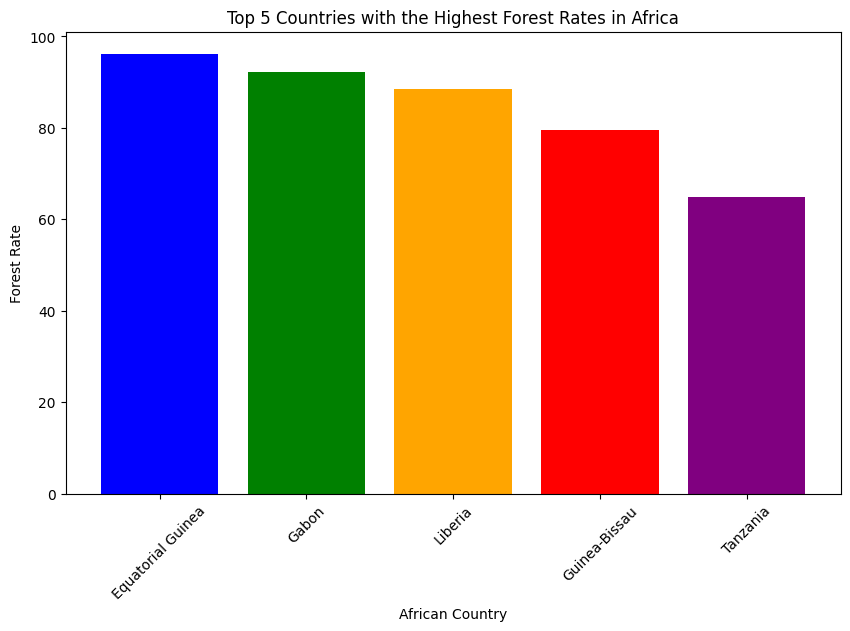

In [16]:


colors_matplotlib = ['blue', 'green', 'orange', 'red', 'purple']
# Convert 'year' column to string to concatenate with the result
df_africa['year'] = df_africa['year'].astype(str)

# Group by country and find the row with the maximum value
max_forest_rates_africa = df_africa.loc[df_africa.groupby('country_code')['value'].idxmax()]

# Sort the data by forest rates in descending order and select the top 5
top_5_countries = max_forest_rates_africa.sort_values(by='value', ascending=False).head(5)

# Plotting the bar chart for the top 5 countries
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['country_name'], top_5_countries['value'], color=colors_matplotlib)
plt.xlabel('African Country')
plt.ylabel('Forest Rate')
plt.title('Top 5 Countries with the Highest Forest Rates in Africa')
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd
import plotly.express as px

asia_df = df[df['country_name'].isin(asia_countries)]
# Create a scatter plot for forest coverage in Asia
fig = px.scatter_geo(asia_df, locations='country_name', locationmode='country names',
                     hover_name='country_name', size='value',
                     title='Forest Coverage in Asia',
                     labels={'value': 'Forest Coverage'},
                     color_continuous_scale='greens')

fig.update_layout(geo=dict(scope='asia', showframe=False, showcoastlines=False))

fig.show()

/tmp/ipykernel_47/3115414831.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



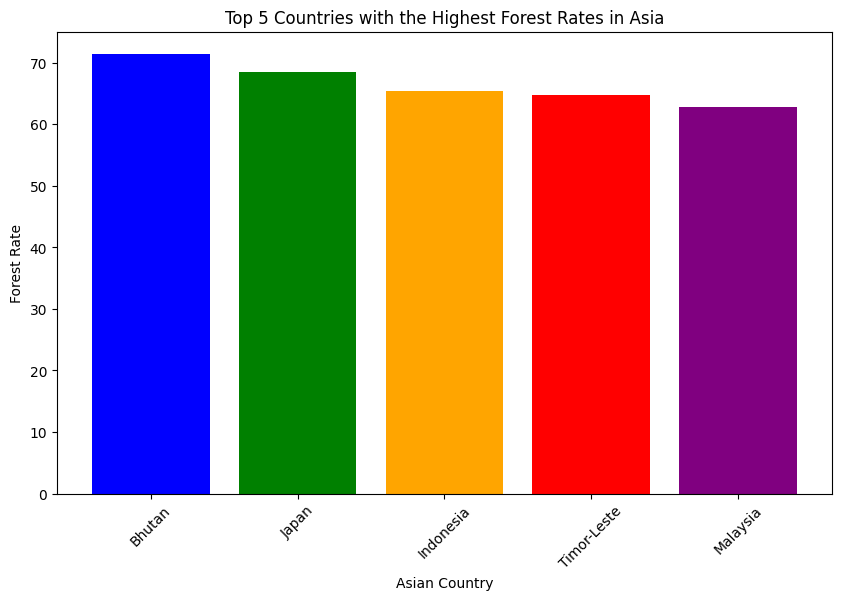

In [19]:
#barchart asia
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'year' column to string to concatenate with the result
df_asia['year'] = df_asia['year'].astype(str)

# Group by country and find the row with the maximum value
max_forest_rates_asia = df_asia.loc[df_asia.groupby('country_code')['value'].idxmax()]

# Sort the data by forest rates in descending order and select the top 5
top_5_countries_asia = max_forest_rates_asia.sort_values(by='value', ascending=False).head(5)

# Plotting the bar chart for the top 5 Asian countries
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries_asia['country_name'], top_5_countries_asia['value'],color=colors_matplotlib)
plt.xlabel('Asian Country')
plt.ylabel('Forest Rate')
plt.title('Top 5 Countries with the Highest Forest Rates in Asia')
plt.xticks(rotation=45)
plt.show()

In [21]:
import pandas as pd
import plotly.express as px

europe_df = df[df['country_name'].isin(europe_countries)]
# Create a scatter plot for forest coverage in Europe
fig = px.scatter_geo(europe_df, locations='country_name', locationmode='country names',
                     hover_name='country_name', size='value',
                     title='Forest Coverage in Europe',
                     labels={'value': 'Forest Coverage'},
                     color_continuous_scale='greens')

fig.update_layout(geo=dict(scope='europe', showframe=False, showcoastlines=False))

fig.show()

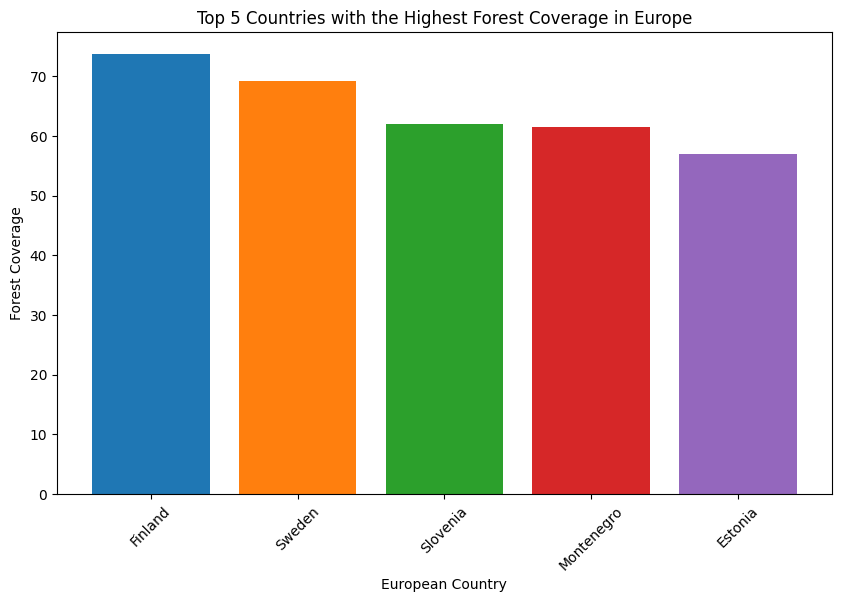

In [22]:
import itertools

# Group by country and find the row with the maximum value
max_forest_rates_europe = df_europe.loc[df_europe.groupby('country_code')['value'].idxmax()]

# Sort the data by forest rates in descending order and select the top 5
top_5_countries_europe = max_forest_rates_europe.sort_values(by='value', ascending=False).head(5)

# Get Plotly's Pastel color palette
colors_plotly = px.colors.qualitative.Pastel

# Create an iterator to cycle through the default Matplotlib colors
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Convert Plotly colors to Matplotlib colors
colors_matplotlib = [next(color_cycle) for _ in range(len(colors_plotly))]

# Plotting the bar chart for the top 5 European countries
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries_europe['country_name'], top_5_countries_europe['value'], color=colors_matplotlib)
plt.xlabel('European Country')
plt.ylabel('Forest Coverage')
plt.title('Top 5 Countries with the Highest Forest Coverage in Europe')
plt.xticks(rotation=45)
plt.show()

# Reference
- https://matplotlib.org/stable/users/index.html
- https://pandas.pydata.org/pandas-docs/stable/
- https://plotly.com/python/plotly-express/